### Import Python Packages and Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from lifelines import *
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

### Importing and Analyzing the Dataset

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85       108.15   Yes
3  7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30      1840.75    No
4  9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70       151.65   Yes

In [4]:
df.info()
# No missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Visualization

Text(0.5, 1.0, 'Gender Distribution Among the Customers')

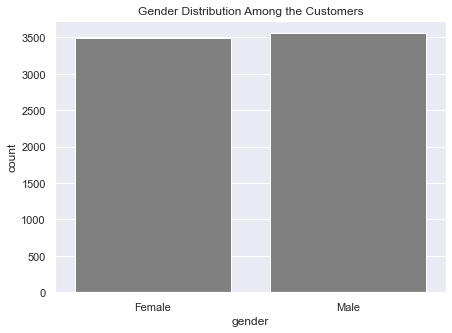

In [5]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(7,5)})

sns.countplot(x='gender',
             data = df,
             color = 'gray'
             ).set_title('Gender Distribution Among the Customers')

Text(0.5, 1.0, 'Distribution of Senior Citizens grouped by Partners')

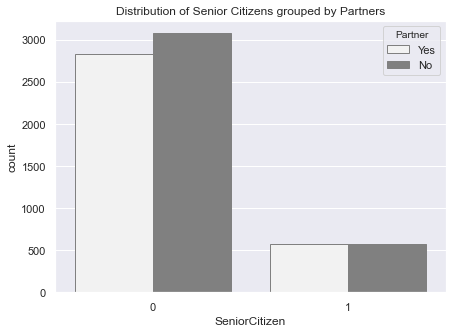

In [6]:
sns.countplot(x='SeniorCitizen', hue='Partner',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Distribution of Senior Citizens grouped by Partners')

Text(0.5, 1.0, 'Customers with Dependents')

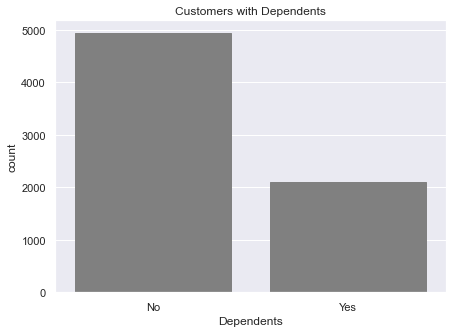

In [7]:
sns.countplot(x='Dependents',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Customers with Dependents')

Text(0.5, 1.0, 'Dependents and Partner Distribution among the Customers')

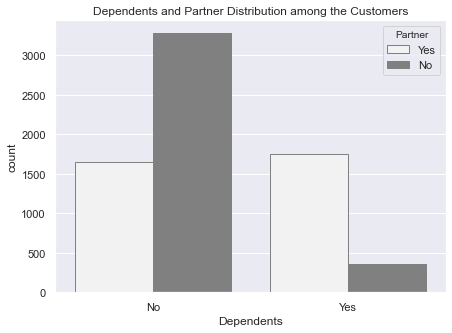

In [8]:
sns.countplot(x='Dependents', hue='Partner',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Dependents and Partner Distribution among the Customers')

Text(0.5, 1.0, 'Dependents and Senior Citizen Distribution')

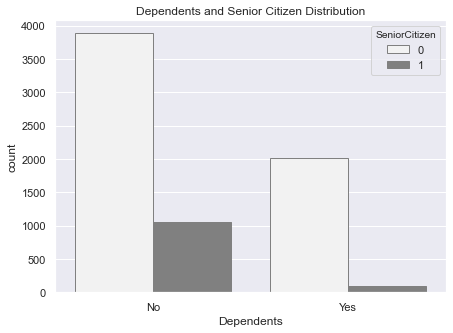

In [9]:
sns.countplot(x='Dependents', hue = 'SeniorCitizen',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Dependents and Senior Citizen Distribution')

Text(0.5, 1.0, 'Customers with Phone Service')

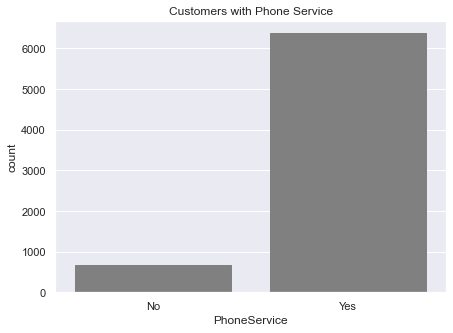

In [10]:
sns.countplot(x='PhoneService',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Customers with Phone Service')

Text(0.5, 1.0, 'Gender Distribution and Multiple Lines')

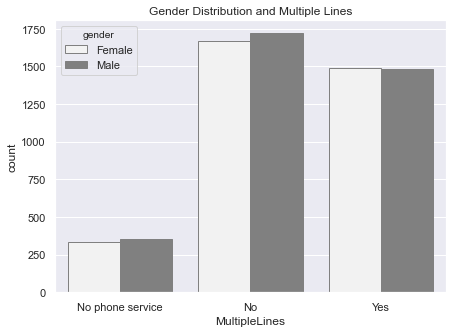

In [11]:
sns.countplot(x='MultipleLines', hue = 'gender',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Gender Distribution and Multiple Lines')

Text(0.5, 1.0, 'Phone Service and Multiple Lines')

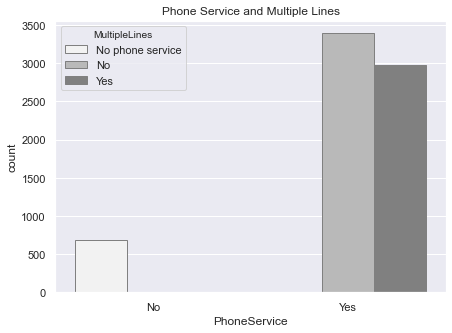

In [12]:
sns.countplot(x='PhoneService', hue = 'MultipleLines',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Phone Service and Multiple Lines')

Text(0.5, 1.0, 'Internet Service')

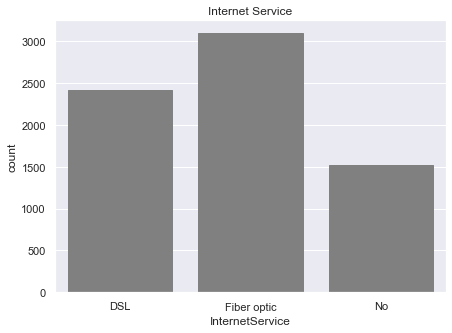

In [13]:
sns.countplot(x='InternetService',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service')

Text(0.5, 1.0, 'Online Security')

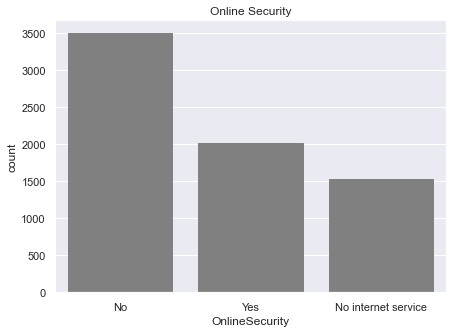

In [14]:
sns.countplot(x='OnlineSecurity',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Online Security')

Text(0.5, 1.0, 'Internet Service and Online Security')

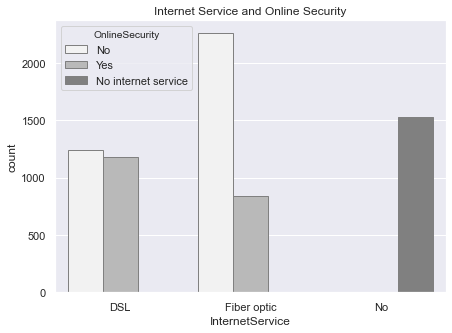

In [15]:
sns.countplot(x='InternetService', hue = 'OnlineSecurity',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Online Security')

Text(0.5, 1.0, 'Internet Service and Online Backup')

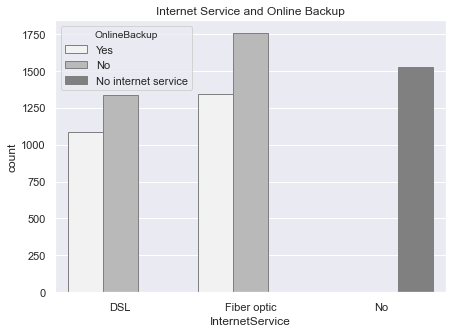

In [16]:
sns.countplot(x='InternetService', hue = 'OnlineBackup',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Online Backup')

Text(0.5, 1.0, 'Internet Service and Device Protection')

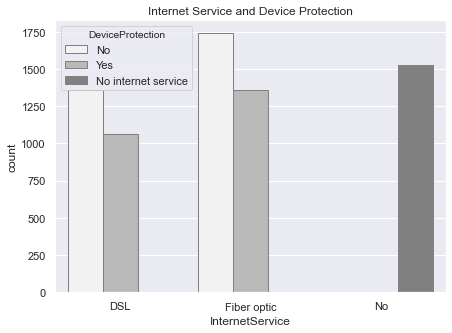

In [17]:
sns.countplot(x='InternetService', hue = 'DeviceProtection',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Device Protection')

Text(0.5, 1.0, 'Internet Service and Tech Support')

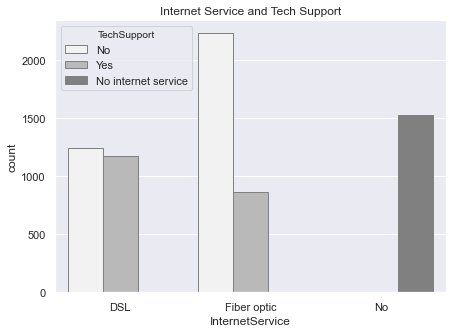

In [18]:
sns.countplot(x='InternetService', hue = 'TechSupport',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Tech Support')

Text(0.5, 1.0, 'Internet Service and Streaming TV')

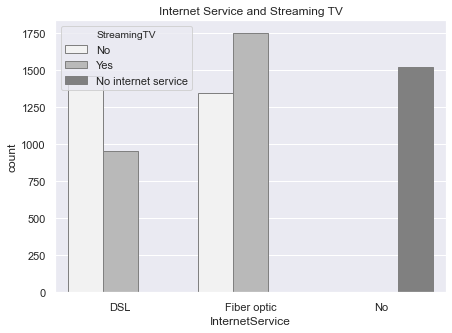

In [19]:
sns.countplot(x='InternetService', hue = 'StreamingTV',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Streaming TV')

Text(0.5, 1.0, 'Internet Service and Streaming Movies')

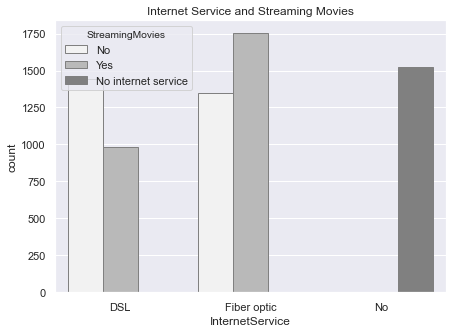

In [20]:
sns.countplot(x='InternetService', hue = 'StreamingMovies',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Streaming Movies')

Text(0.5, 1.0, 'Types of Contracts among the Customers')

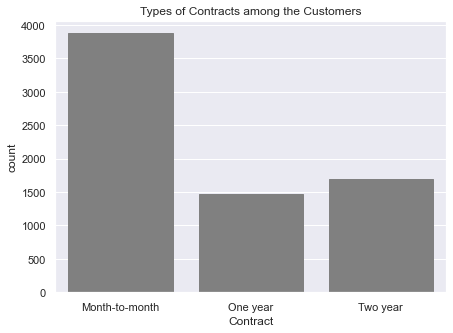

In [21]:
sns.countplot(x='Contract',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Types of Contracts among the Customers')

Text(0.5, 1.0, 'Contract Type and Paperless Billing')

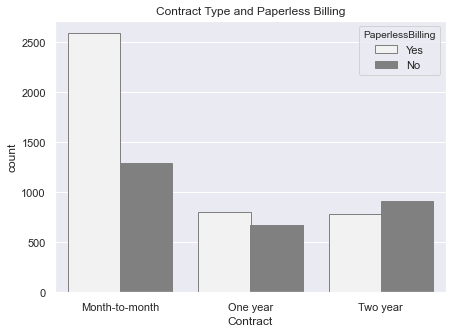

In [22]:
sns.countplot(x='Contract', hue = 'PaperlessBilling',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Contract Type and Paperless Billing')

Text(0.5, 1.0, 'Contract Type and Payment Method')

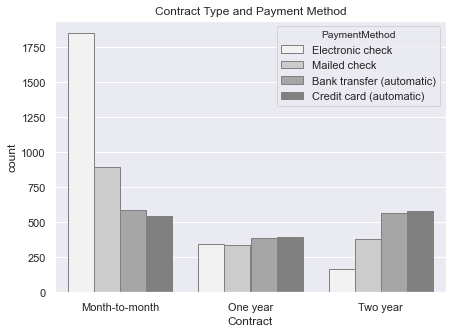

In [23]:
sns.countplot(x='Contract', hue = 'PaymentMethod',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Contract Type and Payment Method')

Text(0.5, 1.0, 'Churning Customers grouped by Gender')

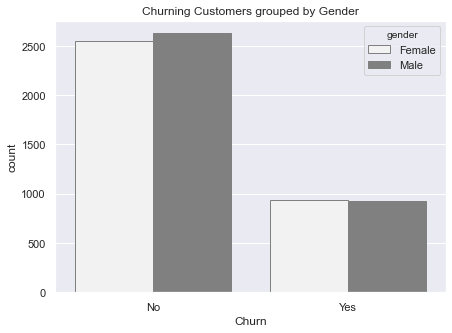

In [24]:
sns.countplot(x='Churn', hue = 'gender',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Gender')

Text(0.5, 1.0, 'Churning Customers grouped by Senior or Normal Citizens')

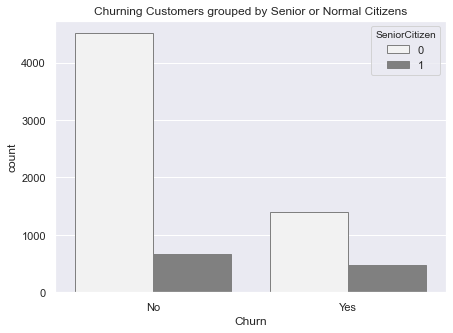

In [25]:
sns.countplot(x='Churn', hue = 'SeniorCitizen',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Senior or Normal Citizens')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Partners')

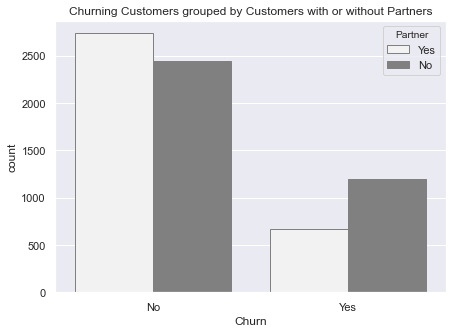

In [26]:
sns.countplot(x='Churn', hue = 'Partner',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Partners')

Text(0.5, 1.0, 'Churning Customers grouped by Dependents or No Dependents')

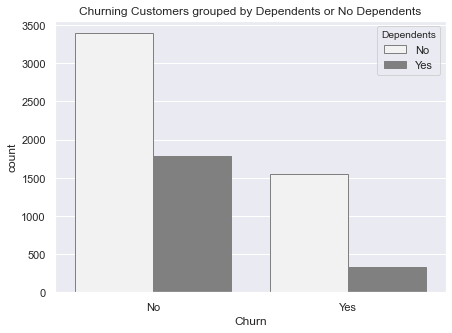

In [27]:
sns.countplot(x='Churn', hue = 'Dependents',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Dependents or No Dependents')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Phone Service')

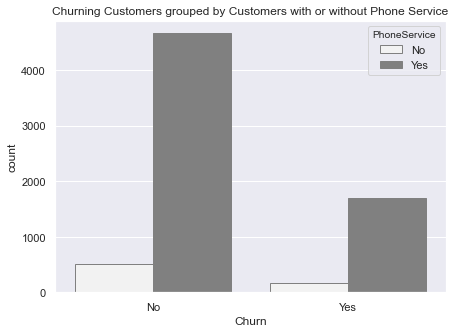

In [28]:
sns.countplot(x='Churn', hue = 'PhoneService',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Phone Service')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Multiple Phone Lines')

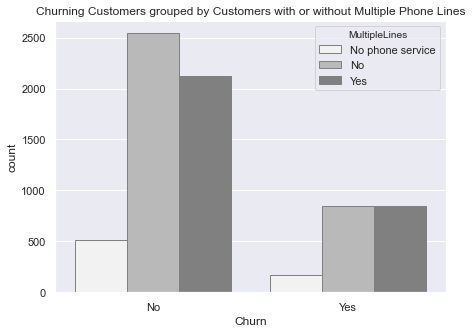

In [29]:
sns.countplot(x='Churn', hue = 'MultipleLines',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Multiple Phone Lines')

Text(0.5, 1.0, 'Churning Customers grouped by type of Internet Service')

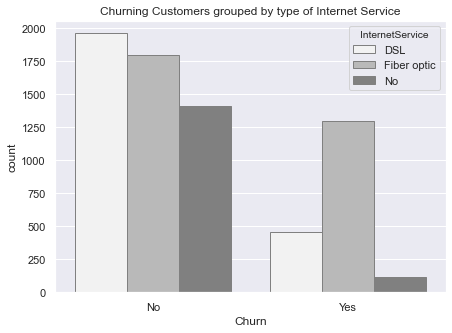

In [30]:
sns.countplot(x='Churn', hue = 'InternetService',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by type of Internet Service')

Text(0.5, 1.0, 'Churning Customers grouped by type of Online Security')

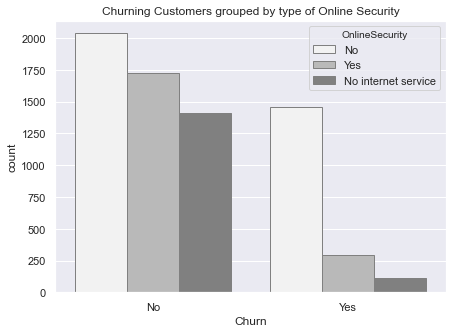

In [31]:
sns.countplot(x='Churn', hue = 'OnlineSecurity',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by type of Online Security')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Online Backup')

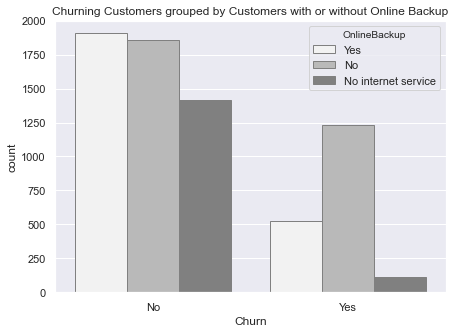

In [32]:
sns.countplot(x='Churn', hue = 'OnlineBackup',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Online Backup')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Device Protection')

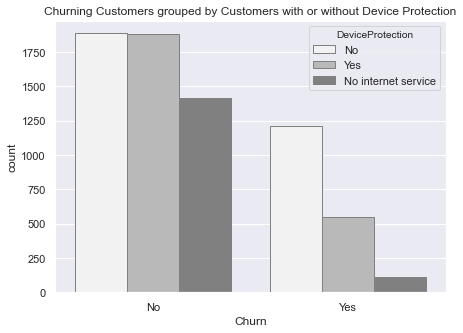

In [33]:
sns.countplot(x='Churn', hue = 'DeviceProtection',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Device Protection')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Tech Support')

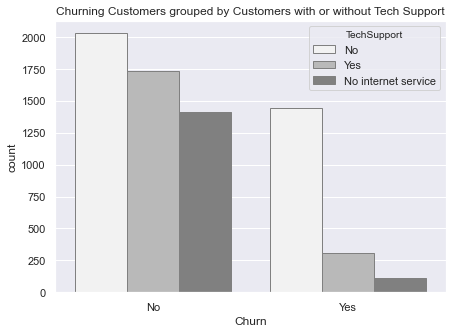

In [34]:
sns.countplot(x='Churn', hue = 'TechSupport',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Tech Support')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Streaming TV')

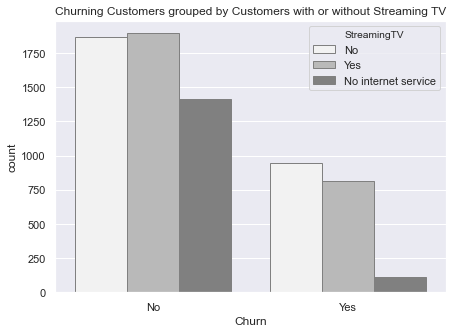

In [35]:
sns.countplot(x='Churn', hue = 'StreamingTV',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Streaming TV')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Streaming Movies')

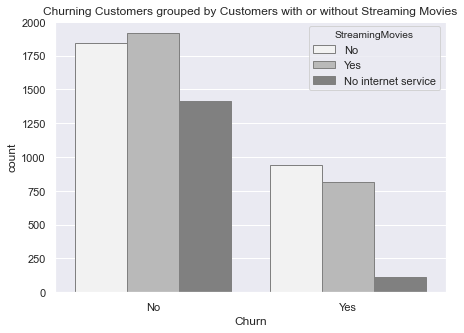

In [36]:
sns.countplot(x='Churn', hue = 'StreamingMovies',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Streaming Movies')

Text(0.5, 1.0, 'Churning Customers grouped by the Contract Type')

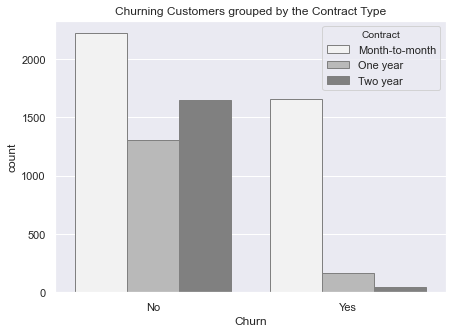

In [37]:
sns.countplot(x='Churn', hue = 'Contract',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by the Contract Type')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Paperless Billing')

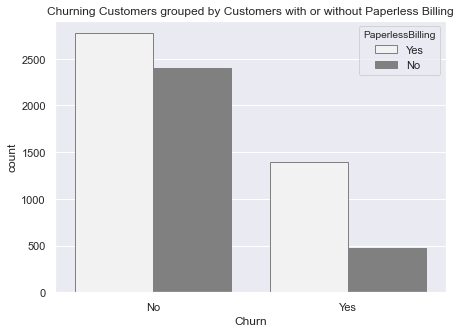

In [38]:
sns.countplot(x='Churn', hue = 'PaperlessBilling',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Paperless Billing')

Text(0.5, 1.0, 'Churning Customers grouped by the type of Payment Method')

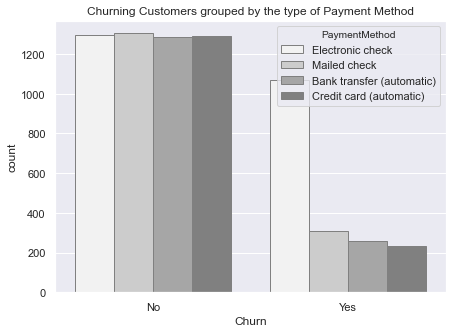

In [39]:
sns.countplot(x='Churn', hue = 'PaymentMethod',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by the type of Payment Method')

<AxesSubplot:>

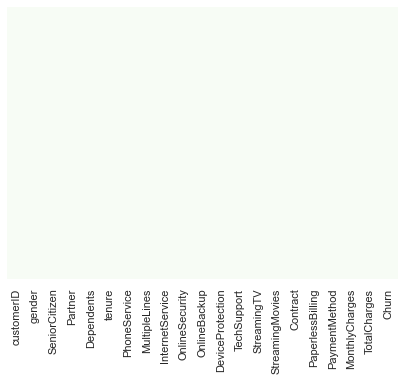

In [40]:
# Checking for Null Values
# In this case, there are no Null values since we cannot see any lines in the figure below
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Greens')

### Data Analysis

In [41]:
df[['Churn', 'gender', 'customerID']].groupby(['gender', 'Churn']).count()

customerID
gender Churn            
Female No           2549
       Yes           939
Male   No           2625
       Yes           930

In [42]:
df[['Churn', 'SeniorCitizen', 'customerID']].groupby(['SeniorCitizen', 'Churn']).count()

customerID
SeniorCitizen Churn            
0             No           4508
              Yes          1393
1             No            666
              Yes           476

In [43]:
df[['gender', 'SeniorCitizen', 'Churn', 'customerID']].groupby(['gender', 'SeniorCitizen', 'Churn']).count()

customerID
gender SeniorCitizen Churn            
Female 0             No           2221
                     Yes           699
       1             No            328
                     Yes           240
Male   0             No           2287
                     Yes           694
       1             No            338
                     Yes           236

### Data Preprocessing
We are creating a new column that has the value 1 if the customer is a Female. Otherwise, it will have a value of 0 in case if the customer is a Male.

In [44]:
print(df.gender.value_counts())
df['Female'] = df['gender'] == 'Female'
df['Female'] = df['Female'].astype(int)
df.drop('gender', axis =1, inplace = True)

Male      3555
Female    3488
Name: gender, dtype: int64


In [45]:
print(df.Female.value_counts())

0    3555
1    3488
Name: Female, dtype: int64


We are modifying the Partner column to be 1 if the customer has a partner and 0 otherwise.

In [46]:
print(df.Partner.value_counts())
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

No     3641
Yes    3402
Name: Partner, dtype: int64


In [47]:
print(df.Partner.value_counts())

0    3641
1    3402
Name: Partner, dtype: int64


The Senior Citizen column is already in the desired format, so we do not need to modify it.

In [48]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

We are modifying the Dependents column to be 1 if the customer has Dependent and 0 otherwise.

In [49]:
print(df.Dependents.value_counts())
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

No     4933
Yes    2110
Name: Dependents, dtype: int64


In [50]:
print(df.Dependents.value_counts())

0    4933
1    2110
Name: Dependents, dtype: int64


We are modifying the Phone Service column to be 1 if the customer has Phone Service Available and 0 otherwise.

In [51]:
print(df.PhoneService.value_counts())
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

Yes    6361
No      682
Name: PhoneService, dtype: int64


In [52]:
print(df.PhoneService.value_counts())

1    6361
0     682
Name: PhoneService, dtype: int64


We are modifying the Multiple Lines column to be 1 if the customer has Multiple Lines and 0 otherwise.

In [53]:
print(df.MultipleLines.value_counts())
df['MultipleLines'] = df['MultipleLines'].map({'Yes':1, 'No':0, 'No phone service': 0})

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


In [54]:
print(df.MultipleLines.value_counts())

0    4072
1    2971
Name: MultipleLines, dtype: int64


In [55]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

We are modifying the Online Security column to be 1 if the customer has Online Security and 0 otherwise.

In [56]:
print(df.OnlineSecurity.value_counts())
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


In [57]:
print(df.OnlineSecurity.value_counts())

0    5024
1    2019
Name: OnlineSecurity, dtype: int64


We are modifying the Online Backup column to be 1 if the customer has Online Backup and 0 otherwise.

In [58]:
print(df.OnlineBackup.value_counts())
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service':0})

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


In [59]:
print(df.OnlineBackup.value_counts())

0    4614
1    2429
Name: OnlineBackup, dtype: int64


We are modifying the Device Protection column to be 1 if the customer has Device Protection and 0 otherwise.

In [60]:
print(df.DeviceProtection.value_counts())
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service':0})

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


In [61]:
print(df.DeviceProtection.value_counts())

0    4621
1    2422
Name: DeviceProtection, dtype: int64


We are modifying the Tech Support column to be 1 if the customer has Tech Support and 0 otherwise.

In [62]:
print(df.TechSupport.value_counts())
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service':0})

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


In [63]:
print(df.TechSupport.value_counts())

0    4999
1    2044
Name: TechSupport, dtype: int64


We are modifying the Streaming TV column to be 1 if the customer has Streaming TV and 0 otherwise.

In [64]:
print(df.StreamingTV.value_counts())
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service':0})

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


In [65]:
print(df.StreamingTV.value_counts())

0    4336
1    2707
Name: StreamingTV, dtype: int64


We are modifying the Streaming Movies column to be 1 if the customer has Streaming TV and 0 otherwise.

In [66]:
print(df.StreamingMovies.value_counts())
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service':0})

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


In [67]:
print(df.StreamingMovies.value_counts())

0    4311
1    2732
Name: StreamingMovies, dtype: int64


We will One-Hot Encode the Contract Column later.

In [68]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

We are modifying the Paperless Billing column to be 1 if the customer has Paperless Billing and 0 otherwise.

In [69]:
print(df.PaperlessBilling.value_counts())
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No':0})

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


In [70]:
print(df.PaperlessBilling.value_counts())

1    4171
0    2872
Name: PaperlessBilling, dtype: int64


We will One-Hot Encode the Payment Method Column later.

In [71]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

We are modifying the Churn column to be 1 if the customer has Churned and 0 otherwise.

In [72]:
print(df.Churn.value_counts())
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

No     5174
Yes    1869
Name: Churn, dtype: int64


In [73]:
print(df.Churn.value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


Taking Care of a few missing values in the Total Charges column.

In [74]:
# Since the number of missing values in this column is low, we replace them with mean
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan).astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [76]:
df.head()

customerID  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies        Contract  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Churn  Female
0  7590-VHVEG              0        1           0       1             0              0             DSL               0             1                 0            0            0                0  Month-to-month                 1           Electronic check           29.85         29.85      0       1
1  5575-GNVDE              0        0           0      34             1              0             DSL               1             0                 1            0            0                0        One year                 0               Mailed check           56.95       1889.50      0       0
2  3668-QPYBK              0        0           0       2             1              0             DSL               1             1                 0            0            0                0  Month-to-month                 1               Mailed check           53.85        108.15      1       0
3  7795-CFOCW              0        0           0      45             0              0             DSL               1             0                 1            1            0                0        One year                 0  Bank transfer (automatic)           42.30       1840.75      0       0
4  9237-HQITU              0        0           0       2             1              0     Fiber optic               0             0                 0            0            0                0  Month-to-month                 1           Electronic check           70.70        151.65      1       1

Training multiple Kaplan Meier Fitter Models

In [77]:
T = df['tenure']
E = df['Churn']

In [78]:
# from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

<AxesSubplot:xlabel='timeline'>

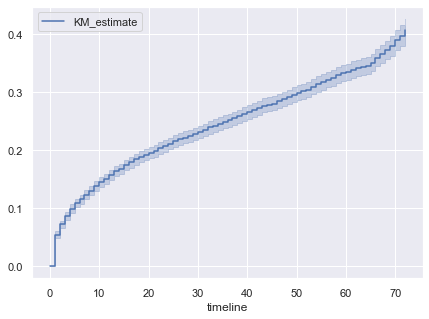

In [79]:
# print(kmf.cumulative_density_)
kmf.plot_cumulative_density()

<AxesSubplot:xlabel='timeline'>

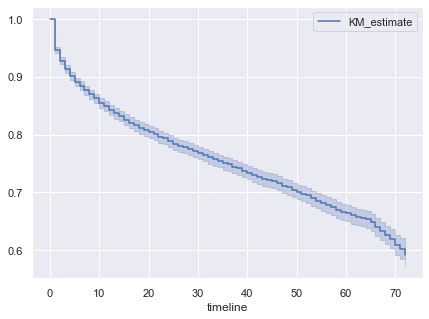

In [80]:
kmf.plot_survival_function()

In [81]:
median_ = kmf.median_survival_time_
# The estimated median time to event. np.inf if doesn't exist
print('Median Value: ' + str(median_))

Median Value: inf


### Survival Analysis of Churning Customer Groups

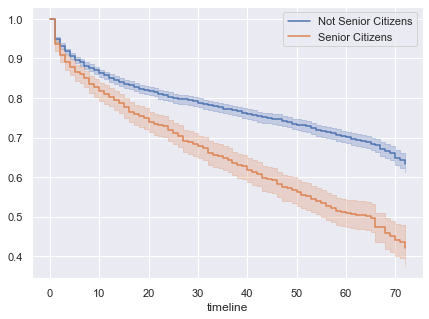

In [82]:
seniorCitizen = (df['SeniorCitizen']==1)

kmf.fit(T[~seniorCitizen], E[~seniorCitizen], label = 'Not Senior Citizens')
ax = kmf.plot()

kmf.fit(T[seniorCitizen], E[seniorCitizen], label = 'Senior Citizens')
ax = kmf.plot(ax=ax)

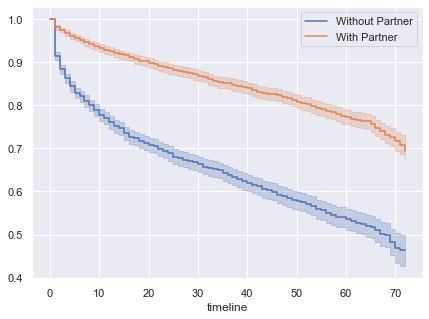

In [83]:
Partner = (df['Partner']==1)

kmf.fit(T[~Partner], E[~Partner], label = 'Without Partner')
ax = kmf.plot()

kmf.fit(T[Partner], E[Partner], label = 'With Partner')
ax = kmf.plot(ax=ax)

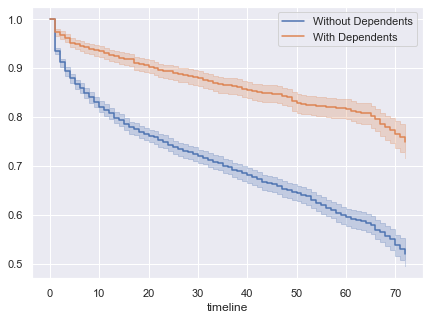

In [84]:
Dependents = (df['Dependents']==1)

kmf.fit(T[~Dependents], E[~Dependents], label = 'Without Dependents')
ax = kmf.plot()

kmf.fit(T[Dependents], E[Dependents], label = 'With Dependents')
ax = kmf.plot(ax=ax)

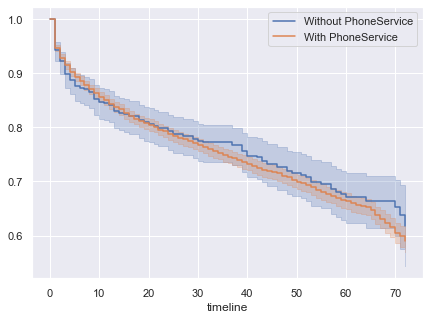

In [85]:
PhoneService = (df['PhoneService']==1)

kmf.fit(T[~PhoneService], E[~PhoneService], label = 'Without PhoneService')
ax = kmf.plot()

kmf.fit(T[PhoneService], E[PhoneService], label = 'With PhoneService')
ax = kmf.plot(ax=ax)

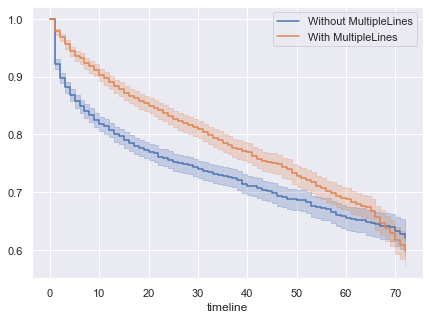

In [86]:
MultipleLines = (df['MultipleLines']==1)

kmf.fit(T[~MultipleLines], E[~MultipleLines], label = 'Without MultipleLines')
ax = kmf.plot()

kmf.fit(T[MultipleLines], E[MultipleLines], label = 'With MultipleLines')
ax = kmf.plot(ax=ax)

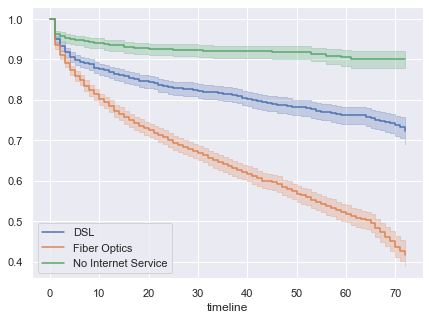

In [87]:
InternetServiceDSL = (df['InternetService']=='DSL')
InternetServiceFiberOptic = (df['InternetService']=='Fiber optic')
NoInternetService = (df['InternetService']=='No')

kmf.fit(T[InternetServiceDSL], E[InternetServiceDSL], label ='DSL')
ax = kmf.plot()

kmf.fit(T[InternetServiceFiberOptic], E[InternetServiceFiberOptic], label ='Fiber Optics')
ax = kmf.plot()

kmf.fit(T[NoInternetService], E[NoInternetService], label ='No Internet Service')
ax = kmf.plot()

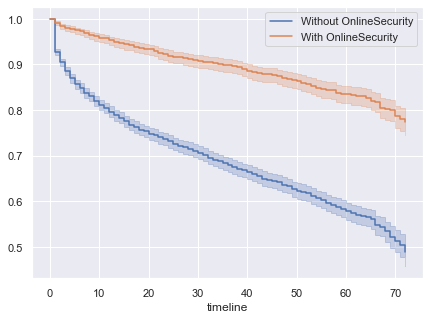

In [88]:
OnlineSecurity = (df['OnlineSecurity']==1)

kmf.fit(T[~OnlineSecurity], E[~OnlineSecurity], label = 'Without OnlineSecurity')
ax = kmf.plot()

kmf.fit(T[OnlineSecurity], E[OnlineSecurity], label = 'With OnlineSecurity')
ax = kmf.plot(ax=ax)

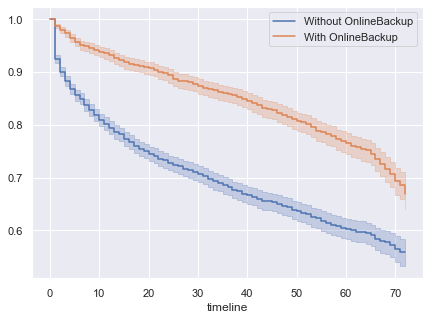

In [89]:
OnlineBackup = (df['OnlineBackup']==1)

kmf.fit(T[~OnlineBackup], E[~OnlineBackup], label = 'Without OnlineBackup')
ax = kmf.plot()

kmf.fit(T[OnlineBackup], E[OnlineBackup], label = 'With OnlineBackup')
ax = kmf.plot(ax=ax)

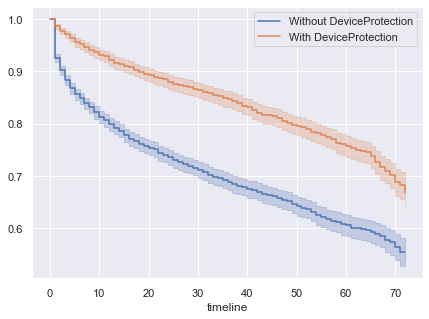

In [90]:
DeviceProtection = (df['DeviceProtection']==1)

kmf.fit(T[~DeviceProtection], E[~DeviceProtection], label = 'Without DeviceProtection')
ax = kmf.plot()

kmf.fit(T[DeviceProtection], E[DeviceProtection], label = 'With DeviceProtection')
ax = kmf.plot(ax=ax)

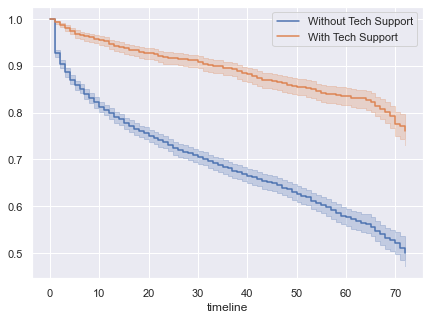

In [91]:
TechSupport = (df['TechSupport']==1)

kmf.fit(T[~TechSupport], E[~TechSupport], label = 'Without Tech Support')
ax = kmf.plot()

kmf.fit(T[TechSupport], E[TechSupport], label = 'With Tech Support')
ax = kmf.plot(ax=ax)

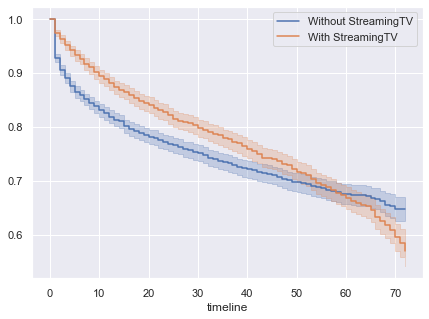

In [92]:
StreamingTV = (df['StreamingTV']==1)

kmf.fit(T[~StreamingTV], E[~StreamingTV], label = 'Without StreamingTV')
ax = kmf.plot()

kmf.fit(T[StreamingTV], E[StreamingTV], label = 'With StreamingTV')
ax = kmf.plot(ax=ax)

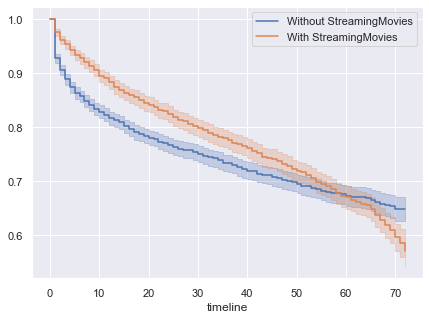

In [93]:
StreamingMovies = (df['StreamingMovies']==1)

kmf.fit(T[~StreamingMovies], E[~StreamingMovies], label = 'Without StreamingMovies')
ax = kmf.plot()

kmf.fit(T[StreamingMovies], E[StreamingMovies], label = 'With StreamingMovies')
ax = kmf.plot(ax=ax)

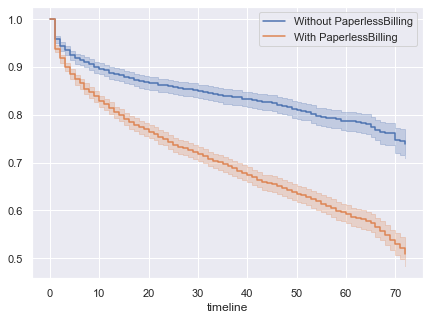

In [94]:
PaperlessBilling = (df['PaperlessBilling']==1)

kmf.fit(T[~PaperlessBilling], E[~PaperlessBilling], label = 'Without PaperlessBilling')
ax = kmf.plot()

kmf.fit(T[PaperlessBilling], E[PaperlessBilling], label = 'With PaperlessBilling')
ax = kmf.plot(ax=ax)

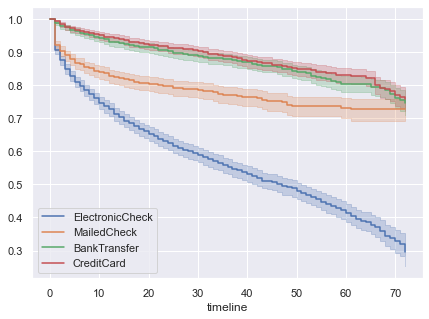

In [95]:
ElectronicCheck = (df['PaymentMethod']=='Electronic check')
MailedCheck = (df['PaymentMethod']=='Mailed check')
BankTransfer = (df['PaymentMethod']=='Bank transfer (automatic)')
CreditCard = (df['PaymentMethod']=='Credit card (automatic)')

kmf.fit(T[ElectronicCheck], E[ElectronicCheck], label ='ElectronicCheck')
ax = kmf.plot()

kmf.fit(T[MailedCheck], E[MailedCheck], label ='MailedCheck')
ax = kmf.plot()

kmf.fit(T[BankTransfer], E[BankTransfer], label ='BankTransfer')
ax = kmf.plot()

kmf.fit(T[CreditCard], E[CreditCard], label ='CreditCard')
ax = kmf.plot()

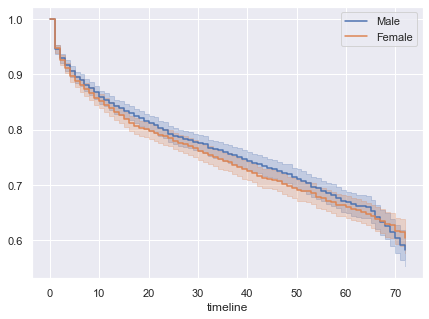

In [96]:
Female = (df['Female']==1)

kmf.fit(T[~Female], E[~Female], label = 'Male')
ax = kmf.plot()

kmf.fit(T[Female], E[Female], label = 'Female')
ax = kmf.plot(ax=ax)

### Training a Cox Proportional Hazard Regression Model

In [97]:
cols_of_interest = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod',
                   'MonthlyCharges', 'TotalCharges', 'Female', 'Churn']
data = df[cols_of_interest]
data.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies        Contract  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  Female  Churn
0              0        1           0       1             0              0             DSL               0             1                 0            0            0                0  Month-to-month                 1           Electronic check           29.85         29.85       1      0
1              0        0           0      34             1              0             DSL               1             0                 1            0            0                0        One year                 0               Mailed check           56.95       1889.50       0      0
2              0        0           0       2             1              0             DSL               1             1                 0            0            0                0  Month-to-month                 1               Mailed check           53.85        108.15       0      1
3              0        0           0      45             0              0             DSL               1             0                 1            1            0                0        One year                 0  Bank transfer (automatic)           42.30       1840.75       0      0
4              0        0           0       2             1              0     Fiber optic               0             0                 0            0            0                0  Month-to-month                 1           Electronic check           70.70        151.65       1      1

In [98]:
data = pd.get_dummies(data)
# Dropping these columns to avoid 'Matrix singularity error when training the model'
# We previously did not one-hot encode these columns in the preprocessing section as they were needed for modeling.
data.drop('Contract_Two year', axis=1, inplace = True)
data.drop('PaymentMethod_Mailed check', axis = 1, inplace = True)
data.drop('InternetService_Fiber optic', axis =1, inplace = True)
data.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Female  Churn  InternetService_DSL  InternetService_No  Contract_Month-to-month  Contract_One year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check
0              0        1           0       1             0              0               0             1                 0            0            0                0                 1           29.85         29.85       1      0                    1                   0                        1                  0                                        0                                      0                               1
1              0        0           0      34             1              0               1             0                 1            0            0                0                 0           56.95       1889.50       0      0                    1                   0                        0                  1                                        0                                      0                               0
2              0        0           0       2             1              0               1             1                 0            0            0                0                 1           53.85        108.15       0      1                    1                   0                        1                  0                                        0                                      0                               0
3              0        0           0      45             0              0               1             0                 1            1            0                0                 0           42.30       1840.75       0      0                    1                   0                        0                  1                                        1                                      0                               0
4              0        0           0       2             1              0               0             0                 0            0            0                0                 1           70.70        151.65       1      1                    0                   0                        1                  0                                        0                                      0                               1

In [99]:
cph = CoxPHFitter()
cph.fit(data, 'tenure', event_col = 'Churn', show_progress = True)

Iteration 1: norm_delta = 2.42809, step_size = 0.9000, log_lik = -15653.03964, newton_decrement = 2319.28370, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.75180, step_size = 0.9000, log_lik = -13373.09236, newton_decrement = 474.28171, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.19590, step_size = 0.9000, log_lik = -12839.05175, newton_decrement = 137.54091, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.53579, step_size = 1.0000, log_lik = -12677.08477, newton_decrement = 15.87658, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.08528, step_size = 1.0000, log_lik = -12659.99262, newton_decrement = 0.29420, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00260, step_size = 1.0000, log_lik = -12659.69315, newton_decrement = 0.00025, seconds_since_start = 0.1
Iteration 7: norm_delta = 0.00000, step_size = 1.0000, log_lik = -12659.69290, newton_decrement = 0.00000, seconds_since_start = 0.1
Convergence success after 7 iterations.


<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

<AxesSubplot:xlabel='log(HR) (95% CI)'>

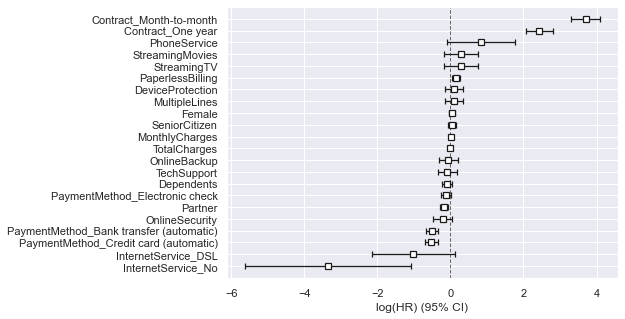

In [100]:
cph.plot()
# Produces a visual representation of the coefficients (ie. log hazard ratios),
# including their standard errors and magnitudes.
# Think of it like a magnitude of the impact.
# Examples:
# If you have no internet services then the chances of churning is lower than fiber optics
# Contract of one year has higher chance than a two-year contract
# Contract of month-to-month contract has chance than a two-year contract and one-year contract

In [101]:
cph.params_ # The estimated coefficients

covariate
SeniorCitizen                              0.034453
Partner                                   -0.177998
Dependents                                -0.091525
PhoneService                               0.828169
MultipleLines                              0.086928
OnlineSecurity                            -0.213291
OnlineBackup                              -0.055995
DeviceProtection                           0.087723
TechSupport                               -0.084330
StreamingTV                                0.281108
StreamingMovies                            0.286625
PaperlessBilling                           0.149824
MonthlyCharges                             0.013162
TotalCharges                              -0.001603
Female                                     0.039404
InternetService_DSL                       -1.017472
InternetService_No                        -3.356393
Contract_Month-to-month                    3.700998
Contract_One year                          2.434555
Pa

<AxesSubplot:>

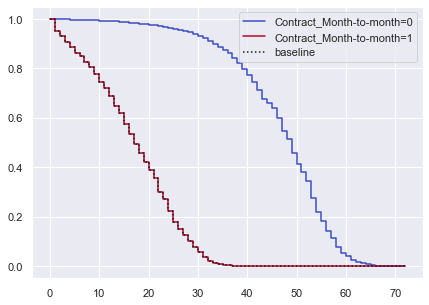

In [111]:
#[Deprecated] cph.plot_covariate_groups('Contract_Month-to-month', [0, 1], cmap='coolwarm')  
cph.plot_partial_effects_on_outcome('Contract_Month-to-month', [0, 1], cmap='coolwarm', plot_baseline=True)
# "We can plot what the survival curves look like as we vary a single covariate while holding everything else equal.
# This is useful to understand the impact of a covariate, given the model. To do this, we use the plot_covariate_groups()
# method and give it the covariate of interest, and the values to display."

Read More about Predict Expectation Here: https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html?highlight=predict_expectation#lifelines.fitters.coxph_fitter.CoxPHFitter.predict_expectation

In [104]:
cph.predict_expectation(data)

0       20.433055
1       44.854506
2       12.317133
3       56.734993
4        4.594059
          ...    
7038    39.605354
7039    71.825685
7040    26.577785
7041     5.354433
7042    71.966575
Length: 7043, dtype: float64

Read more about Predict Log Partial Hazard Here: https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html?highlight=cph.predict_log_partial_hazard#lifelines.fitters.coxph_fitter.CoxPHFitter.predict_log_partial_hazard

In [105]:
cph.predict_log_partial_hazard(data)

0       3.536191
1       0.516105
2       4.603133
3      -1.021369
4       5.958260
          ...   
7038    1.171405
7039   -6.421250
7040    2.776610
7041    5.785661
7042   -8.079302
Length: 7043, dtype: float64

In [106]:
# The event_observed variable provided
cph.event_observed

488     False
753     False
936     False
1082    False
1340    False
        ...  
3439     True
3890     True
4513     True
4610     True
6424     True
Name: Churn, Length: 7043, dtype: bool

In [107]:
cph.baseline_cumulative_hazard_

baseline cumulative hazard
0.0                     0.000000
1.0                     0.000868
2.0                     0.001293
3.0                     0.001703
4.0                     0.002158
5.0                     0.002588
6.0                     0.002912
7.0                     0.003388
8.0                     0.003863
9.0                     0.004475
10.0                    0.005203
11.0                    0.005803
12.0                    0.006657
13.0                    0.007674
14.0                    0.008452
15.0                    0.009828
16.0                    0.011071
17.0                    0.012414
18.0                    0.013853
19.0                    0.015233
20.0                    0.016726
21.0                    0.018350
22.0                    0.021276
23.0                    0.022962
24.0                    0.026421
25.0                    0.030573
26.0                    0.033707
27.0                    0.036949
28.0                    0.040404
29.0                    0.045235
30.0                    0.051347
31.0                    0.058442
32.0                    0.068226
33.0                    0.076840
34.0                    0.085180
35.0                    0.097458
36.0                    0.107492
37.0                    0.124209
38.0                    0.141290
39.0                    0.161984
40.0                    0.183657
41.0                    0.211010
42.0                    0.242452
43.0                    0.281740
44.0                    0.300152
45.0                    0.321139
46.0                    0.367383
47.0                    0.431322
48.0                    0.477762
49.0                    0.563338
50.0                    0.631405
51.0                    0.693242
52.0                    0.766243
53.0                    0.921252
54.0                    1.083075
55.0                    1.214070
56.0                    1.391248
57.0                    1.556389
58.0                    1.843650
59.0                    2.085093
60.0                    2.308855
61.0                    2.664017
62.0                    2.939252
63.0                    3.183270
64.0                    3.456090
65.0                    4.205552
66.0                    5.411821
67.0                    6.533983
68.0                    7.908056
69.0                    9.810564
70.0                   13.719329
71.0                   16.996782
72.0                   23.881880

<AxesSubplot:>

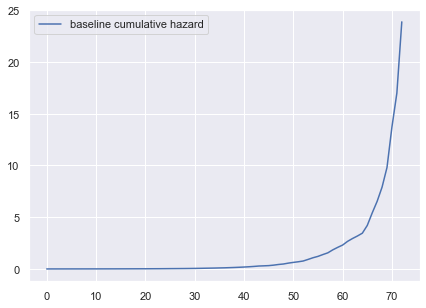

In [108]:
sns.lineplot(data=cph.baseline_cumulative_hazard_)

<AxesSubplot:>

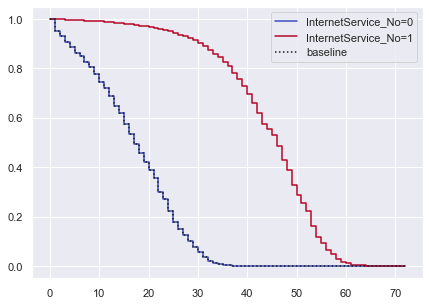

In [110]:
cph.plot_partial_effects_on_outcome('InternetService_No', [0,1], cmap='coolwarm')
# why do the plots look different?

<AxesSubplot:>

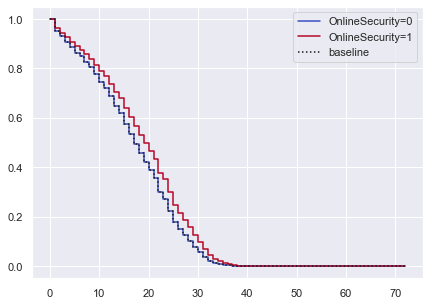

In [112]:
cph.plot_partial_effects_on_outcome('OnlineSecurity', [0,1], cmap='coolwarm')

<AxesSubplot:>

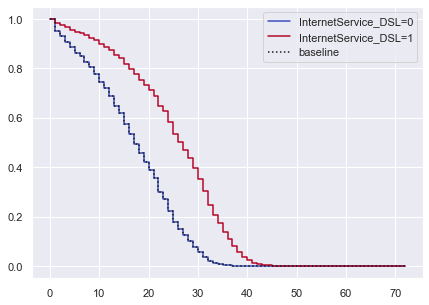

In [113]:
cph.plot_partial_effects_on_outcome('InternetService_DSL', [0,1], cmap='coolwarm')

<AxesSubplot:>

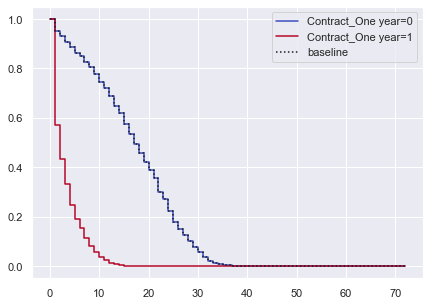

In [114]:
cph.plot_partial_effects_on_outcome('Contract_One year', [0,1], cmap='coolwarm')

<AxesSubplot:>

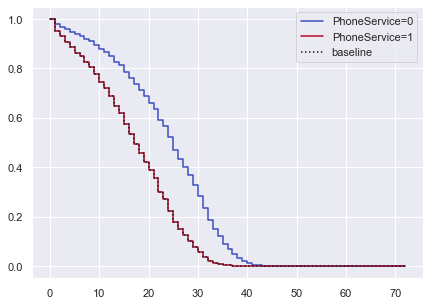

In [115]:
cph.plot_partial_effects_on_outcome('PhoneService', [0,1], cmap='coolwarm')

<AxesSubplot:>

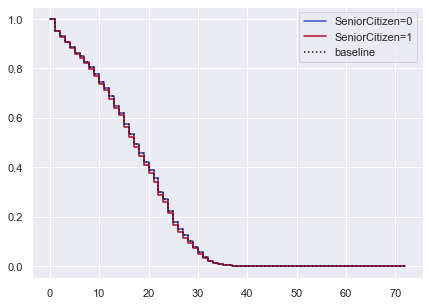

In [116]:
cph.plot_partial_effects_on_outcome('SeniorCitizen', [0,1], cmap='coolwarm')

<AxesSubplot:>

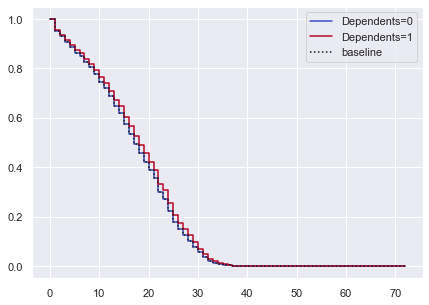

In [117]:
cph.plot_partial_effects_on_outcome('Dependents', [0,1], cmap='coolwarm')

Text(0.5, 1.0, 'SeniorCitizen with Partner')

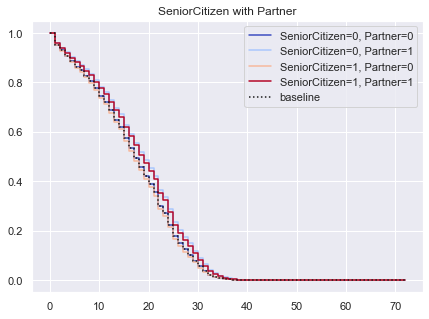

In [119]:
cph.plot_partial_effects_on_outcome(['SeniorCitizen','Partner'],
                                    [
                                        [0,0],
                                        [0,1],
                                        [1,0],
                                        [1,1],
                                    ],
                                    cmap='coolwarm')
#plt.savefig('SeniorCitizen with Partner.png')
plt.title('SeniorCitizen with Partner')

Text(0.5, 1.0, 'SeniorCitizen with Dependents')

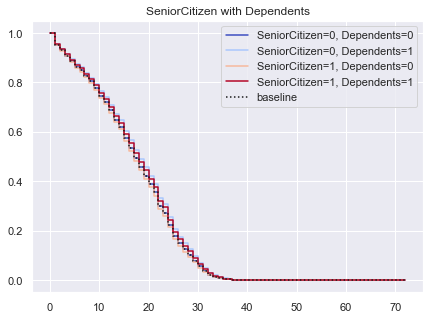

In [120]:
cph.plot_partial_effects_on_outcome(['SeniorCitizen','Dependents'],
                                    [
                                        [0,0],
                                        [0,1],
                                        [1,0],
                                        [1,1],
                                    ],
                                    cmap='coolwarm')
#plt.savefig('SeniorCitizen with Partner.png')
plt.title('SeniorCitizen with Dependents')

Text(0.5, 1.0, 'Internet Services and Phone Services')

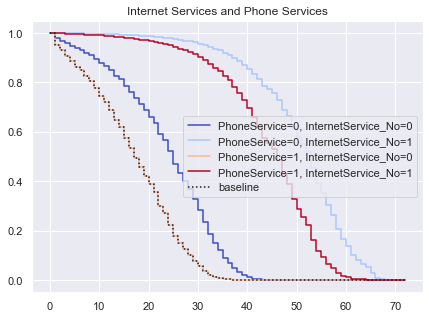

In [121]:
cph.plot_partial_effects_on_outcome(['PhoneService','InternetService_No'],
                                    [
                                        [0,0],
                                        [0,1],
                                        [1,0],
                                        [1,1],
                                    ],
                                    cmap='coolwarm')
#plt.savefig('SeniorCitizen with Partner.png')
plt.title('Internet Services and Phone Services')

### Predicting Survical of all the Customers

In [122]:
data['ID'] = df['customerID']
data.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Female  Churn  InternetService_DSL  InternetService_No  Contract_Month-to-month  Contract_One year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check          ID
0              0        1           0       1             0              0               0             1                 0            0            0                0                 1           29.85         29.85       1      0                    1                   0                        1                  0                                        0                                      0                               1  7590-VHVEG
1              0        0           0      34             1              0               1             0                 1            0            0                0                 0           56.95       1889.50       0      0                    1                   0                        0                  1                                        0                                      0                               0  5575-GNVDE
2              0        0           0       2             1              0               1             1                 0            0            0                0                 1           53.85        108.15       0      1                    1                   0                        1                  0                                        0                                      0                               0  3668-QPYBK
3              0        0           0      45             0              0               1             0                 1            1            0                0                 0           42.30       1840.75       0      0                    1                   0                        0                  1                                        1                                      0                               0  7795-CFOCW
4              0        0           0       2             1              0               0             0                 0            0            0                0                 1           70.70        151.65       1      1                    0                   0                        1                  0                                        0                                      0                               1  9237-HQITU

In [123]:
cph.predict_survival_function(data.drop('ID', axis=1))

0             1              2         3              4              5              6              7             8         9              10        11        12        13             14        15        16        17             18             19             20            21            22        23        24            25        26             27        28             29        30             31            32            33             34        35             36            37    \
0.0    1.000000e+00  1.000000e+00   1.000000e+00  1.000000   1.000000e+00   1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00  1.000000   1.000000e+00  1.000000  1.000000  1.000000   1.000000e+00  1.000000  1.000000  1.000000   1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00  1.000000  1.000000  1.000000e+00  1.000000   1.000000e+00  1.000000   1.000000e+00  1.000000   1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  1.000000   1.000000e+00  1.000000e+00   
1.0    9.706445e-01  9.985472e-01   9.170454e-01  0.999688   7.147920e-01   7.022601e-01   9.809028e-01   9.810580e-01  9.918190e-01  0.999947   9.696501e-01  0.999939  0.999981  0.999733   9.875182e-01  1.000000  0.999589  1.000000   9.763290e-01   9.623845e-01   9.408156e-01  9.992682e-01  9.930701e-01  0.999994  0.999659  9.943782e-01  0.999588   9.776605e-01  1.000000   9.558436e-01  1.000000   6.204170e-01  9.988400e-01  9.958317e-01   9.418669e-01  1.000000   7.831436e-01  9.988791e-01   
2.0    9.565688e-01  9.978356e-01   8.789256e-01  0.999534   6.063007e-01   5.905278e-01   9.716737e-01   9.719028e-01  9.878325e-01  0.999922   9.551087e-01  0.999909  0.999971  0.999602   9.814557e-01  1.000000  0.999387  1.000000   9.649294e-01   9.444630e-01   9.130919e-01  9.989096e-01  9.896902e-01  0.999990  0.999492  9.916336e-01  0.999386   9.668911e-01  1.000000   9.349127e-01  1.000000   4.909557e-01  9.982717e-01  9.937944e-01   9.146129e-01  1.000000   6.946960e-01  9.983300e-01   
3.0    9.431906e-01  9.971501e-01   8.436726e-01  0.999387   5.173180e-01   4.996647e-01   9.628574e-01   9.631565e-01  9.840040e-01  0.999897   9.412947e-01  0.999880  0.999962  0.999475   9.756457e-01  1.000000  0.999193  1.000000   9.540641e-01   9.274995e-01   8.871353e-01  9.985640e-01  9.864422e-01  0.999987  0.999331  9.889944e-01  0.999191   9.566198e-01  1.000000   9.151657e-01  1.000000   3.917800e-01  9.977242e-01  9.918341e-01   8.890823e-01  1.000000   6.188890e-01  9.978008e-01   
4.0    9.285952e-01  9.963915e-01   8.062846e-01  0.999223   4.339418e-01   4.152712e-01   9.531886e-01   9.535636e-01  9.797821e-01  0.999869   9.262316e-01  0.999847  0.999952  0.999335   9.692524e-01  1.000000  0.998978  1.000000   9.421758e-01   9.090713e-01   8.592537e-01  9.981815e-01  9.828582e-01  0.999984  0.999153  9.860803e-01  0.998975   9.453738e-01  1.000000   8.937863e-01  1.000000   3.051600e-01  9.971182e-01  9.896679e-01   8.616431e-01  1.000000   5.445611e-01  9.972152e-01   
5.0    9.149800e-01  9.956736e-01   7.724026e-01  0.999069   3.674020e-01   3.485248e-01   9.441205e-01   9.445660e-01  9.758002e-01  0.999843   9.121874e-01  0.999817  0.999942  0.999203   9.632359e-01  1.000000  0.998774  1.000000   9.310528e-01   8.919553e-01   8.336550e-01  9.978193e-01  9.794757e-01  0.999981  0.998984  9.833282e-01  0.998771   9.348444e-01  1.000000   8.739982e-01  1.000000   2.408525e-01  9.965446e-01  9.876207e-01   8.364362e-01  1.000000   4.824128e-01  9.966609e-01   
6.0    9.048443e-01  9.951326e-01   7.477956e-01  0.998952   3.240591e-01   3.053827e-01   9.373390e-01   9.378368e-01  9.728079e-01  0.999823   9.017370e-01  0.999794  0.999935  0.999103   9.587232e-01  1.000000  0.998621  1.000000   9.227513e-01   8.792608e-01   8.148555e-01  9.975462e-01  9.769325e-01  0.999978  0.998857  9.812578e-01  0.998617   9.269813e-01  1.000000   8.593653e-01  1.000000   2.014850e-01  9.961123e-01  9.860796e-01   8.179154e-01  1.000000   4.402807e-01  9.962431e-01   
7.0    8.901683

In [124]:
cph.predict_median(data.drop('ID', axis=1))

0       22.0
1       47.0
2       13.0
3       59.0
4        4.0
        ... 
7038    42.0
7039     inf
7040    29.0
7041     4.0
7042     inf
Name: 0.5, Length: 7043, dtype: float64

Read more about Predict Partial Hazard here
https://www.kaggle.com/taimurzahid/survival-regression-analysis-to-predict-churn?scriptVersionId=59374988&cellId=179

In [125]:
cph.predict_partial_hazard(data.drop('ID', axis =1))

0        34.335899
1         1.675488
2        99.796493
3         0.360101
4       386.936421
           ...    
7038      3.226524
7039      0.001627
7040     16.064462
7041    325.597196
7042      0.000310
Length: 7043, dtype: float64

Read more about Predict Median Here: https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html#lifelines.fitters.coxph_fitter.CoxPHFitter.predict_median

In [126]:
cph.predict_median(data)

0       22.0
1       47.0
2       13.0
3       59.0
4        4.0
        ... 
7038    42.0
7039     inf
7040    29.0
7041     4.0
7042     inf
Name: 0.5, Length: 7043, dtype: float64

### Predicting Survival of a specific Customer

In [127]:
customer_id = '3668-QPYBK'
input_ = data.loc[data['ID'] == customer_id]
input_.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Female  Churn  InternetService_DSL  InternetService_No  Contract_Month-to-month  Contract_One year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check          ID
2              0        0           0       2             1              0               1             1                 0            0            0                0                 1           53.85        108.15       0      1                    1                   0                        1                  0                                        0                                      0                               0  3668-QPYBK

In [129]:
# Validate
print('Total number of Customers with the id ' + customer_id + ': '+ str(data.loc[data['ID']==customer_id].shape[0]))

Total number of Customers with the id 3668-QPYBK: 1


In [130]:
# Get index of the customer
customer = data[data['ID'] == customer_id].index

# Delete the row containing information for that customer
data.drop(customer, inplace = True)

# Validate
print('Total number of customers with the ID ' + customer_id + ': ' + str(data.loc[data['ID']==customer_id].shape[0]))

Total number of customers with the ID 3668-QPYBK: 0


In [132]:
data.drop('ID', axis = 1, inplace = True)
data.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Female  Churn  InternetService_DSL  InternetService_No  Contract_Month-to-month  Contract_One year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check
0              0        1           0       1             0              0               0             1                 0            0            0                0                 1           29.85         29.85       1      0                    1                   0                        1                  0                                        0                                      0                               1
1              0        0           0      34             1              0               1             0                 1            0            0                0                 0           56.95       1889.50       0      0                    1                   0                        0                  1                                        0                                      0                               0
3              0        0           0      45             0              0               1             0                 1            1            0                0                 0           42.30       1840.75       0      0                    1                   0                        0                  1                                        1                                      0                               0
4              0        0           0       2             1              0               0             0                 0            0            0                0                 1           70.70        151.65       1      1                    0                   0                        1                  0                                        0                                      0                               1
5              0        0           0       8             1              1               0             0                 1            0            1                1                 1           99.65        820.50       1      1                    0                   0                        1                  0                                        0                                      0                               1

In [133]:
cph = CoxPHFitter()
cph.fit(data, 'tenure', event_col = 'Churn', show_progress = True)

Iteration 1: norm_delta = 2.43470, step_size = 0.9000, log_lik = -15644.21706, newton_decrement = 2319.50498, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.74874, step_size = 0.9000, log_lik = -13364.51442, newton_decrement = 474.00114, seconds_since_start = 0.0
Iteration 3: norm_delta = 1.19541, step_size = 0.9000, log_lik = -12830.82343, newton_decrement = 137.39895, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.53545, step_size = 1.0000, log_lik = -12669.02996, newton_decrement = 15.84989, seconds_since_start = 0.1
Iteration 5: norm_delta = 0.08516, step_size = 1.0000, log_lik = -12651.96727, newton_decrement = 0.29333, seconds_since_start = 0.1
Iteration 6: norm_delta = 0.00259, step_size = 1.0000, log_lik = -12651.66869, newton_decrement = 0.00025, seconds_since_start = 0.1
Iteration 7: norm_delta = 0.00000, step_size = 1.0000, log_lik = -12651.66844, newton_decrement = 0.00000, seconds_since_start = 0.1
Convergence success after 7 iterations.


<lifelines.CoxPHFitter: fitted with 7042 total observations, 5174 right-censored observations>

Text(0.5, 1.0, 'Survival of the Customer: 3668-QPYBK')

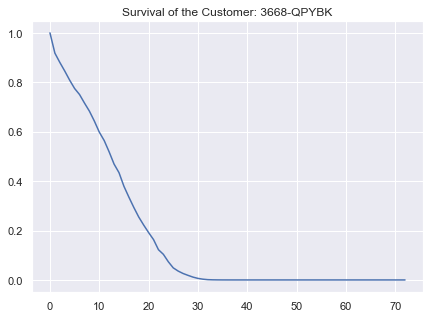

In [134]:
# To predict survival function of a particular customer, we would need to pass the new dataframe that only contains that customer.
results = cph.predict_survival_function(input_.drop('ID', axis =1))
sns.lineplot(data = results,
            legend = False).set_title('Survival of the Customer: '+str(customer_id))

Read more about Predict Partial Hazard Here: https://lifelines.readthedocs.io/en/latest/fitters/regression/CoxPHFitter.html#lifelines.fitters.coxph_fitter.CoxPHFitter.predict_partial_hazard

In [135]:
cph.predict_partial_hazard(input_.drop('ID', axis =1))

2    98.844059
dtype: float64

### Using Cross-Validation Cheme
* This allows us toe be confident that the predictions will work well in practice.
* This also allows us to choose between multiple models.
* An example is as follows.
* Read More Here: https://lifelines.readthedocs.io/en/latest/lifelines.utils.html?highlight=k_fold_cross_validation#lifelines.utils.k_fold_cross_validation

In [138]:
from lifelines.utils import k_fold_cross_validation
cph = CoxPHFitter()

print(np.mean(k_fold_cross_validation(cph, data, duration_col='tenure', event_col='Churn'))) #without data drop on ID

-1.3738305654387053
